In [2]:
#@title Dependencies

print("Load dependencies - START")
!pip install qrcode > /dev/null 2>&1
!pip install matplotlib > /dev/null 2>&1

import matplotlib.pyplot as plt
import numpy as np
import time
import qrcode
from PIL import Image
import tracemalloc
import matplotlib.ticker as ticker

print("Load dependencies - END")

print("Load dependencies - END")

Load dependencies - START
Load dependencies - END
Load dependencies - END


<ipython-input-44-cb823d1f43b9>:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


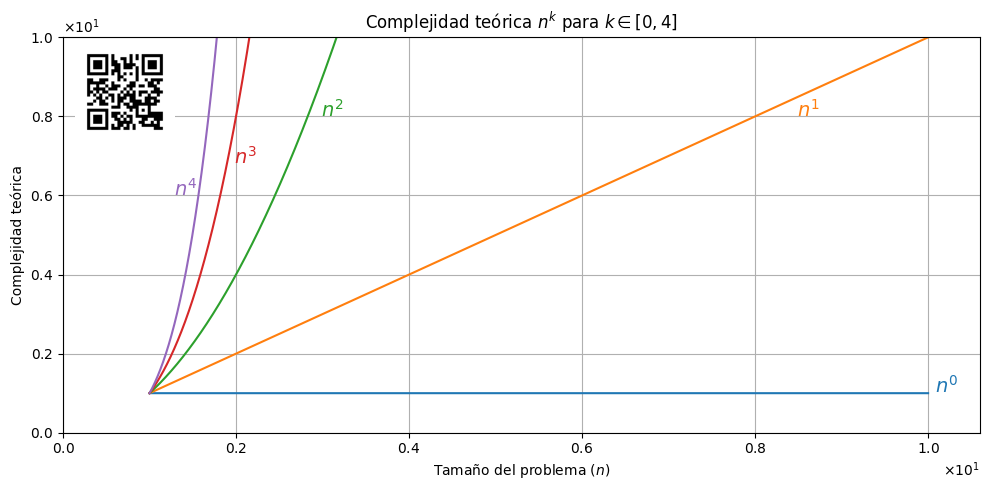

In [44]:
# Valores de k para la complejidad teórica
k_max = 4
ylim = 4
valores_k = np.arange(0, k_max + 1, 1)
tamanos_problema = np.linspace(1, 10, 10**ylim)

# Generar el gráfico
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.set_ylim([0, 10])
ax1.set_xlim([0, 10.6])

# Posiciones para las anotaciones
annotate_positions = {
    4: (1.2, 6),
    3: (1.9, 6.8),
    2: (2.9, 8),
    1: (8.4, 8),
    0: (10, 1)
}

# Graficar las curvas teóricas para k desde 0 hasta ylim-2
for k in valores_k:
    complejidad_teorica = tamanos_problema ** k
    line, = ax1.plot(tamanos_problema, complejidad_teorica, label=f'$n^{{{k}}}$')

    # Anotar la curva correspondiente
    if k in annotate_positions:
        ax1.annotate(f'$n^{{{k}}}$', xy=annotate_positions[k],
                      xytext=(5, 0), textcoords='offset points', fontsize=14, color=line.get_color())

ax1.set_xlabel('Tamaño del problema ($n$)')
ax1.set_ylabel('Complejidad teórica')
ax1.set_title(f'Complejidad teórica $n^k$ para $k \\in [0, {ylim}]$')
ax1.grid(True)

# Formatear los ejes x e y en notación científica
ax1.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Generar el código QR
qr_data = "https://bit.ly/3WKfoED"
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(qr_data)
qr.make(fit=True)
qr_img = qr.make_image(fill_color='black', back_color='white')

# Guardar la imagen del código QR
qr_img_path = "codigo_qr.png"
qr_img.save(qr_img_path)

# Cargar la imagen del código QR con PIL
qr_img_pil = Image.open(qr_img_path)

# Convertir la imagen de PIL a un formato que matplotlib puede manejar
qr_img_np = np.array(qr_img_pil)

# Insertar la imagen del código QR en la gráfica
qr_position = [0.08, 0.68, 0.1, 0.25]
ax_inset = fig.add_axes(qr_position)
ax_inset.imshow(qr_img_np, cmap='gray')
ax_inset.axis('off')

plt.tight_layout()
plt.show()

# Guardar la figura con 300 DPI
fig.savefig('complejidad_teorica_polinomica_1.png', dpi=300)


<ipython-input-51-5f8b84ef8902>:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


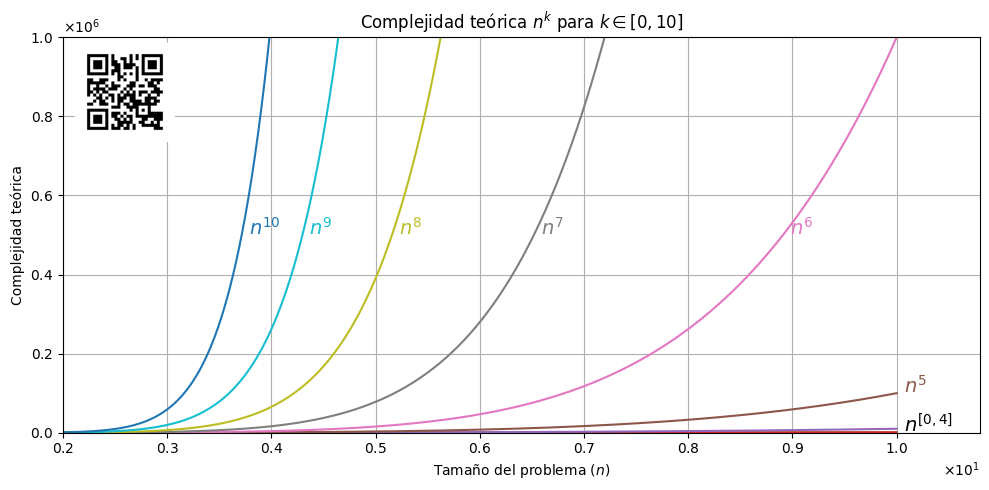

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import qrcode
from PIL import Image

# Valores de k para la complejidad teórica
k_max = 10
ylim = 6
valores_k = np.arange(0, k_max + 1, 1)
tamanos_problema = np.linspace(1, 10, 10**ylim)  # Número de puntos

# Generar el gráfico
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.set_ylim([0, 10**ylim])
ax1.set_xlim([2, 10.8])

# Valor de referencia para las anotaciones
valor_referencia = 0.5 * 10**ylim

# Variable para indicar si ya se ha anotado 'n^{0,k}'
etiqueta_n_0_k_añadida = False

# Graficar las curvas teóricas para k desde 0 hasta 10
for k in valores_k:
    complejidad_teorica = tamanos_problema ** k
    line, = ax1.plot(tamanos_problema, complejidad_teorica, label=f'$n^{{{k}}}$')

    # Encontrar el punto en la curva donde el valor es aproximadamente igual al valor de referencia
    if k >= ylim:
        position_index = np.abs(complejidad_teorica - valor_referencia).argmin()
        ax1.annotate(f'$n^{{{k}}}$', xy=(tamanos_problema[position_index], complejidad_teorica[position_index]),
                     xytext=(5, 0), textcoords='offset points', fontsize=14, color=line.get_color())
    elif k == ylim - 1:
        position_index = -1
        ax1.annotate(f'$n^{ylim-1}$', xy=(tamanos_problema[position_index], complejidad_teorica[position_index]),
                     xytext=(5, 0), textcoords='offset points', fontsize=14, color=line.get_color())
    elif not etiqueta_n_0_k_añadida:
        position_index = -1
        ax1.annotate(f'$n^{{{[0, ylim-2]}}}$', xy=(tamanos_problema[position_index], complejidad_teorica[position_index]),
                     xytext=(5, 0), textcoords='offset points', fontsize=14, color='black')
        etiqueta_n_0_k_añadida = True

ax1.set_xlabel('Tamaño del problema ($n$)')
ax1.set_ylabel('Complejidad teórica')
ax1.set_title(f'Complejidad teórica $n^k$ para $k \\in [0, {k_max}]$')
ax1.grid(True)

# Formatear los ejes x e y en notación científica
ax1.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Generar el código QR
qr_data = "https://bit.ly/3WKfoED"
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(qr_data)
qr.make(fit=True)
qr_img = qr.make_image(fill_color='black', back_color='white')

# Guardar la imagen del código QR
qr_img_path = "codigo_qr.png"
qr_img.save(qr_img_path)

# Cargar la imagen del código QR con PIL
qr_img_pil = Image.open(qr_img_path)

# Convertir la imagen de PIL a un formato que matplotlib puede manejar
qr_img_np = np.array(qr_img_pil)

# Insertar la imagen del código QR en la gráfica
qr_position = [0.08, 0.68, 0.1, 0.25]
ax_inset = fig.add_axes(qr_position)
ax_inset.imshow(qr_img_np, cmap='gray')
ax_inset.axis('off')

plt.tight_layout()
plt.show()

# Guardar la figura con 300 DPI
fig.savefig('complejidad_teorica_polinomica_2.png', dpi=300)
